# Bandit Problem

In [1]:
# imports
import numpy as np

class Bandit:
    def __init__(self, mean=0, stddev=1):
        self.__mean = mean
        self.__stddev = stddev

    '''This method simulates pulling the lever of the bandit and returns the reward'''
    def pullLever(self):
        return np.random.normal(self.__mean, self.__stddev)

import random
import math
import matplotlib.pyplot as plt
# Include your imports here, if any are used. 

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [2]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [3]:
bandits[0].pullLever()

0.6235616293493393

## Greedy algorithm Implementation

In [4]:
def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    Q = [0] * 10
    count = [0] * 10
    rewards = []

    for i in range(1000):
        best = np.argmax(Q)
        reward = bandits[best].pullLever()
        rewards.append(reward)
        count[best] += 1

        Q[best] = Q[best] + (reward - Q[best]) / count[best]

    return rewards
    pass

Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

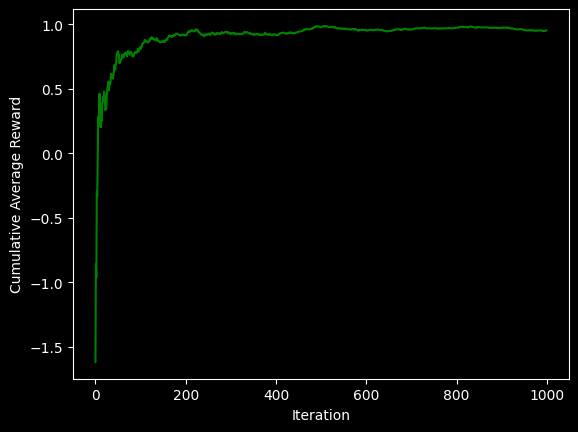

In [5]:
ans = run_greedy()
cum_avg = np.cumsum(ans) / np.arange(1, len(ans) + 1)

plt.plot(cum_avg, color="green")
plt.xlabel("Iteration")
plt.ylabel("Cumulative Average Reward")
plt.show()

## $\epsilon$-greedy Algorithm

In [6]:
def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    # doing 1000 iterations
    Q = [0.0] * 10
    count = [0] * 10
    rewards = []

    for i in range(1000):
        if(random.random() >= epsilon):
            best = np.argmax(Q)
            reward = bandits[best].pullLever()
            rewards.append(reward)
            count[best] += 1

            Q[best] = Q[best] + (reward - Q[best]) / count[best]

        else:
            number = random.randint(0, 9)
            reward = bandits[number].pullLever()
            rewards.append(reward)
            count[number] += 1

            Q[number] = Q[number] + (reward - Q[number]) / count[number]

    return rewards

    pass

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

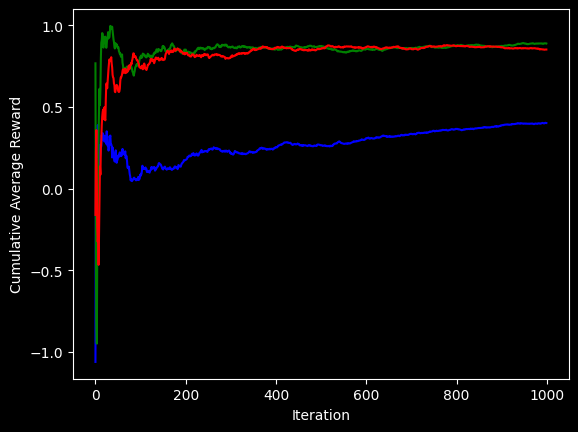

In [7]:
ans = run_epsilon_greedy(0.1)
cum_avg = np.cumsum(ans) / np.arange(1, len(ans) + 1)
ans1 = run_epsilon_greedy(0.03)
cum_avg1 = np.cumsum(ans1) / np.arange(1, len(ans1) + 1)
ans2 = run_epsilon_greedy(0.05)
cum_avg2 = np.cumsum(ans2) / np.arange(1, len(ans2) + 1)
plt.plot(cum_avg, color = 'blue')
plt.plot(cum_avg1, color = 'green')
plt.plot(cum_avg2, color = 'red')
plt.xlabel("Iteration")
plt.ylabel("Cumulative Average Reward")
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

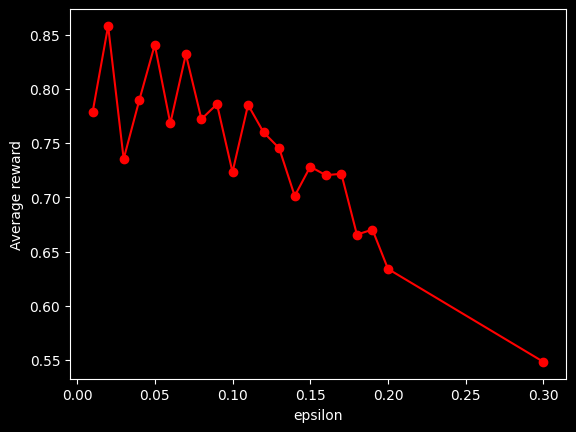

In [8]:
best = -100
best_epsilon = 0

tehe = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
        0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18,
        0.19, 0.20, 0.30]
y = []

for i in tehe:
    epsilon = i
    total = 0

    for _ in range(20):  # repeat experiment
        rewards = run_epsilon_greedy(epsilon)
        total += np.mean(rewards)

    avg_reward = total / 20
    y.append(avg_reward)

    if avg_reward > best:
        best = avg_reward
        best_epsilon = epsilon

plt.plot(tehe, y, marker='o', color='red')
plt.xlabel("epsilon")
plt.ylabel("Average reward")
plt.show()

## Optimistic Initial Values

In [9]:
def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here

    # Return the reward from the bandits in a list
    Q = [10] * 10
    count = [0] * 10
    rewards = []

    for i in range(1000):
        best = np.argmax(Q)
        reward = bandits[best].pullLever()
        rewards.append(reward)
        count[best] += 1

        Q[best] = Q[best] + (reward - Q[best]) / count[best]

    return rewards
    pass

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

Text(0, 0.5, 'Cumulative Average Reward')

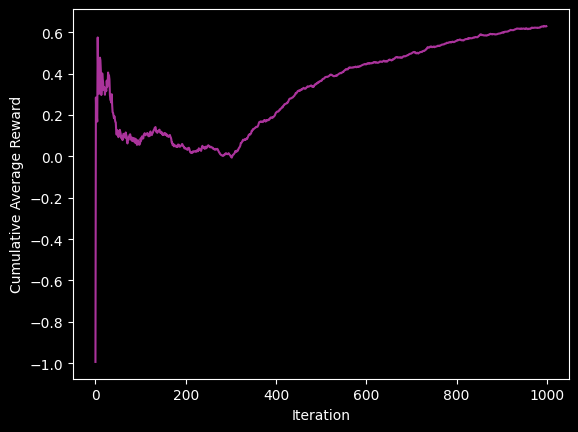

In [10]:
ans = run_greedy()
cum_avg = np.cumsum(ans) / np.arange(1, len(ans) + 1)

plt.plot(cum_avg, color="#aa339b")
plt.xlabel("Iteration")
plt.ylabel("Cumulative Average Reward")

## Upper Confidence Bound (UCB)

In [11]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    Q = [0]*10
    count = [0]*10
    rewards =[]

    for i in range(10):
        reward = bandits[i].pullLever()
        rewards.append(reward)
        count[i] = 1
        Q[i] = reward

    for i in range(10, 1000):
        ucb = Q + c * np.sqrt(np.log(i + 1) / count)
        best = np.argmax(ucb)
        reward = bandits[best].pullLever()
        rewards.append(reward)
        count[best] += 1
        Q[best] += (reward - Q[best]) / count[best]
    return rewards
    pass

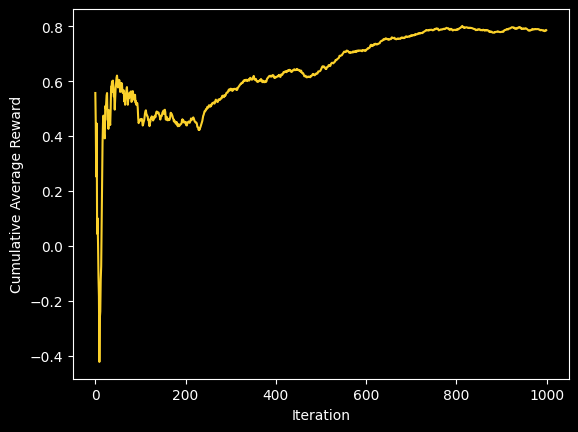

In [12]:
ans = run_ucb(2)
cum_avg = np.cumsum(ans) / np.arange(1, len(ans) + 1)

plt.plot(cum_avg, color="#fbd12b")
plt.xlabel("Iteration")
plt.ylabel("Cumulative Average Reward")
plt.show()